b'<!DOCTYPE html>\r\n<html>\r\n<head><meta charset="utf-8" />\r\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n\r\n<title>02-Binomial-Model</title><script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>\r\n\r\n\r\n\r\n\r\n<style type="text/css">\r\n    pre { line-height: 125%; margin: 0; }\r\ntd.linenos pre { color: #000000; background-color: #f0f0f0; padding: 0 5px 0 5px; }\r\nspan.linenos { color: #000000; background-color: #f0f0f0; padding: 0 5px 0 5px; }\r\ntd.linenos pre.special { color: #000000; background-color: #ffffc0; padding: 0 5px 0 5px; }\r\nspan.linenos.special { color: #000000; background-color: #ffffc0; padding: 0 5px 0 5px; }\r\n.highlight .hll { background-color: var(--jp-cell-editor-active-background) }\r\n.highlight { background: var(--jp-cell-editor-background); color: var(--jp-mirror-editor-variable-color) }\r\n.highlight .c { color: var(--jp-mirror-editor-comment-color); font-style: italic } /* C
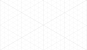

11396

In [16]:

from bs4 import BeautifulSoup
import json
import urllib.request

url = 'file:///D:/Robert/OneDrive/Documents/0%20Coursework/CQF/Jupyter%20Notebooks/Python%20Lab%202%20-%20Binomial%20Trees/Jan%2022%20cohort/02-Binomial-Model.html'
response = urllib.request.urlopen(url)
#  for local html file
# response = open("/Users/note/jupyter/notebook.html")
text = response.read()

print(text)

soup = BeautifulSoup(text, 'lxml')
# see some of the html
print(soup.div)
dictionary = {'nbformat': 4, 'nbformat_minor': 1, 'cells': [], 'metadata': {}}
for d in soup.findAll("div"):
    if 'class' in d.attrs.keys():
        for clas in d.attrs["class"]:
            print(f"clas is {clas}")
            print(d.get_text())
            if clas in ["text_cell_render", "input_area", "jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput ", "jp-Cell-inputWrapper", "jp-InputPrompt", "jp-InputArea-prompt"]:

                # code cell
                if clas == "jp-Cell-inputWrapper":
                    cell = {}
                    cell['metadata'] = {}
                    cell['outputs'] = []
                    cell['source'] = [d.get_text()]
                    cell['execution_count'] = None
                    cell['cell_type'] = 'code'
                    dictionary['cells'].append(cell)

                else:
                    cell = {}
                    cell['metadata'] = {}

                    cell['source'] = [d.decode_contents()]
                    cell['cell_type'] = 'markdown'
                    dictionary['cells'].append(cell)

print('now opening the notebook i think')
open('notebook.ipynb', 'w').write(json.dumps(dictionary))


